In [17]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import math

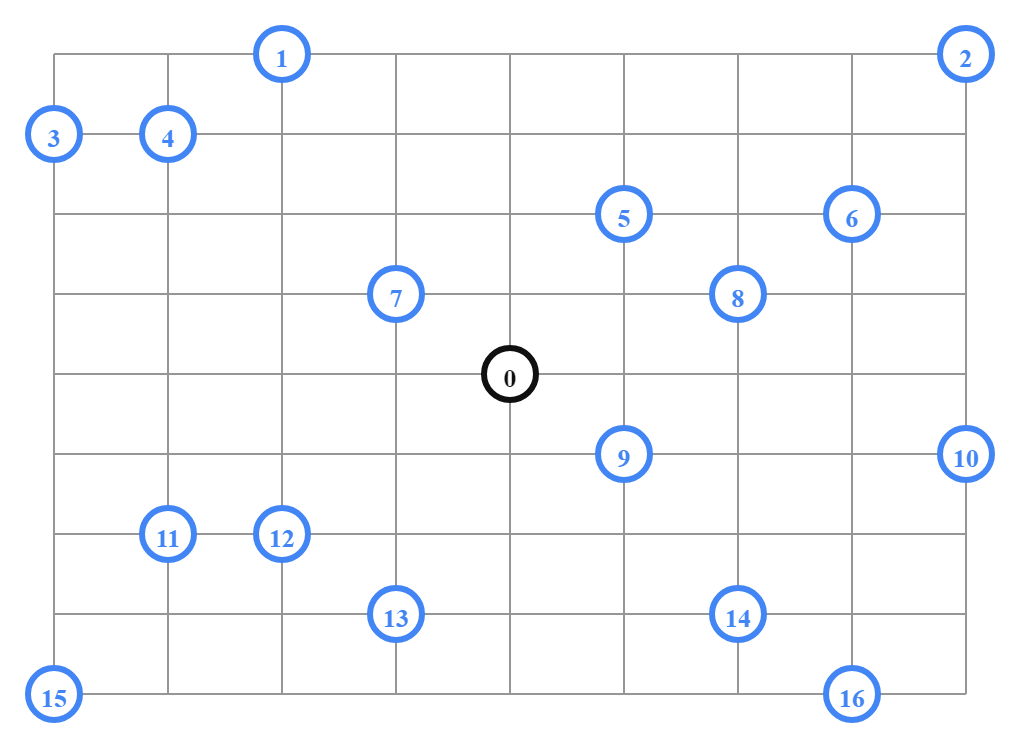

In [23]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    data["locations"] = [
        # fmt: off
      (288, 149), (288, 129), (270, 133), (256, 141), (256, 157), (246, 157),
      (236, 169), (228, 169), (228, 161), (220, 169), (212, 169), (204, 169),
      (196, 169), (188, 169), (196, 161), (188, 145), (172, 145), (164, 145),
      (156, 145), (148, 145), (140, 145), (148, 169), (164, 169), (172, 169),
      (156, 169), (140, 169), (132, 169), (124, 169), (116, 161), (104, 153),
      (104, 161), (104, 169), (90, 165), (80, 157), (64, 157), (64, 165),
      (56, 169), (56, 161), (56, 153), (56, 145), (56, 137), (56, 129),
      (56, 121), (40, 121), (40, 129), (40, 137), (40, 145), (40, 153),
      (40, 161), (40, 169), (32, 169), (32, 161), (32, 153), (32, 145),
      (32, 137), (32, 129), (32, 121), (32, 113), (40, 113), (56, 113),
      (56, 105), (48, 99), (40, 99), (32, 97), (32, 89), (24, 89),
      (16, 97), (16, 109), (8, 109), (8, 97), (8, 89), (8, 81),
      (8, 73), (8, 65), (8, 57), (16, 57), (8, 49), (8, 41),
      (24, 45), (32, 41), (32, 49), (32, 57), (32, 65), (32, 73),
      (32, 81), (40, 83), (40, 73), (40, 63), (40, 51), (44, 43),
      (44, 35), (44, 27), (32, 25), (24, 25), (16, 25), (16, 17),
      (24, 17), (32, 17), (44, 11), (56, 9), (56, 17), (56, 25),
      (56, 33), (56, 41), (64, 41), (72, 41), (72, 49), (56, 49),
      (48, 51), (56, 57), (56, 65), (48, 63), (48, 73), (56, 73),
      (56, 81), (48, 83), (56, 89), (56, 97), (104, 97), (104, 105),
      (104, 113), (104, 121), (104, 129), (104, 137), (104, 145), (116, 145),
      (124, 145), (132, 145), (132, 137), (140, 137), (148, 137), (156, 137),
      (164, 137), (172, 125), (172, 117), (172, 109), (172, 101), (172, 93),
      (172, 85), (180, 85), (180, 77), (180, 69), (180, 61), (180, 53),
      (172, 53), (172, 61), (172, 69), (172, 77), (164, 81), (148, 85),
      (124, 85), (124, 93), (124, 109), (124, 125), (124, 117), (124, 101),
      (104, 89), (104, 81), (104, 73), (104, 65), (104, 49), (104, 41),
      (104, 33), (104, 25), (104, 17), (92, 9), (80, 9), (72, 9),
      (64, 21), (72, 25), (80, 25), (80, 25), (80, 41), (88, 49),
      (104, 57), (124, 69), (124, 77), (132, 81), (140, 65), (132, 61),
      (124, 61), (124, 53), (124, 45), (124, 37), (124, 29), (132, 21),
      (124, 21), (120, 9), (128, 9), (136, 9), (148, 9), (162, 9),
      (156, 25), (172, 21), (180, 21), (180, 29), (172, 29), (172, 37),
      (172, 45), (180, 45), (180, 37), (188, 41), (196, 49), (204, 57),
      (212, 65), (220, 73), (228, 69), (228, 77), (236, 77), (236, 69),
      (236, 61), (228, 61), (228, 53), (236, 53), (236, 45), (228, 45),
      (228, 37), (236, 37), (236, 29), (228, 29), (228, 21), (236, 21),
      (252, 21), (260, 29), (260, 37), (260, 45), (260, 53), (260, 61),
      (260, 69), (260, 77), (276, 77), (276, 69), (276, 61), (276, 53),
      (284, 53), (284, 61), (284, 69), (284, 77), (284, 85), (284, 93),
      (284, 101), (288, 109), (280, 109), (276, 101), (276, 93), (276, 85),
      (268, 97), (260, 109), (252, 101), (260, 93), (260, 85), (236, 85),
      (228, 85), (228, 93), (236, 93), (236, 101), (228, 101), (228, 109),
      (228, 117), (228, 125), (220, 125), (212, 117), (204, 109), (196, 101),
      (188, 93), (180, 93), (180, 101), (180, 109), (180, 117), (180, 125),
      (196, 145), (204, 145), (212, 145), (220, 145), (228, 145), (236, 145),
      (246, 141), (252, 125), (260, 129), (280, 133)
        # fmt: on
    ]
    data["num_vehicles"] = 3
    data["depot"] = 149
    return data

In [24]:
def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(
                    math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
                )
    return distances


In [69]:

def routing_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    max_route_distance = 0
    list_routing = []
    for vehicle_id in range(data["num_vehicles"]):
        routing_i = []
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += f" {manager.IndexToNode(index)} -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
            routing_i.append(manager.IndexToNode(index))
        plan_output += f"{manager.IndexToNode(index)}\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
        list_routing.append(routing_i)
    print(f"Maximum of the route distances: {max_route_distance}m")
    return list_routing,max_route_distance



In [70]:
"""Entry point of the program."""
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_euclidean_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Add Distance constraint.
dimension_name = "Distance"
routing.AddDimension(
    transit_callback_index,
    0,  # no slack
    3000,  # vehicle maximum travel distance
    True,  # start cumul to zero
    dimension_name,
)
distance_dimension = routing.GetDimensionOrDie(dimension_name)
distance_dimension.SetGlobalSpanCostCoefficient(100)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    sol,max_distance=routing_solution(data, manager, routing, solution)
else:
    print("No solution found !")


Objective: 101435
Route for vehicle 0:
 149 ->  144 ->  198 ->  199 ->  143 ->  142 ->  141 ->  140 ->  264 ->  263 ->  262 ->  261 ->  257 ->  258 ->  260 ->  259 ->  277 ->  278 ->  2 ->  279 ->  0 ->  1 ->  241 ->  242 ->  240 ->  239 ->  238 ->  237 ->  236 ->  235 ->  234 ->  233 ->  232 ->  231 ->  230 ->  245 ->  244 ->  243 ->  246 ->  247 ->  248 ->  249 ->  250 ->  229 ->  228 ->  227 ->  226 ->  225 ->  224 ->  223 ->  222 ->  218 ->  221 ->  220 ->  219 ->  216 ->  217 ->  214 ->  213 ->  215 ->  212 ->  211 ->  210 ->  209 ->  208 ->  251 ->  254 ->  255 ->  256 ->  253 ->  252 ->  207 ->  206 ->  205 ->  204 ->  203 ->  202 ->  201 ->  200 ->  197 ->  196 ->  195 ->  194 ->  193 ->  192 ->  191 ->  190 ->  189 ->  188 ->  187 ->  186 ->  185 ->  184 ->  183 ->  182 ->  179 -> 149
Distance of the route: 985m

Route for vehicle 1:
 149 ->  178 ->  180 ->  181 ->  160 ->  161 ->  162 ->  163 ->  164 ->  165 ->  166 ->  167 ->  99 ->  98 ->  97 ->  96 ->  95 ->  94 ->  93 -> 

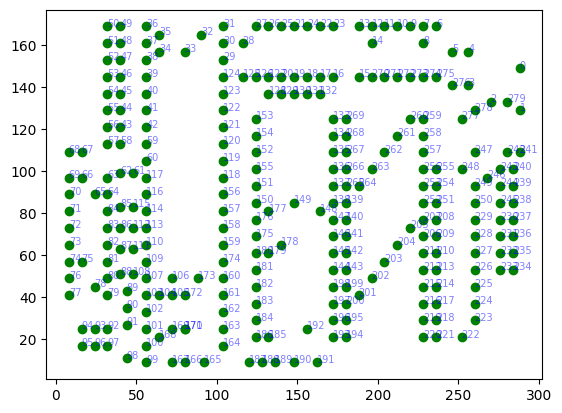

In [80]:
# plot solution :
import matplotlib.pyplot as plt
import numpy as np
x = [i[0] for i in data["locations"]]
y = [i[1] for i in data["locations"]]
for i in range(len(x)):
    plt.text(x[i],y[i],str(i),alpha = 0.5,fontsize = 7,color = 'b')
plt.scatter(x,y,color = 'g')
plt.show()


In [83]:
def plot_solution(sol,label=True):
    if label:
        x_index = [i[0] for i in data["locations"]]
        y_index = [i[1] for i in data["locations"]]
        for i in range(len(data["locations"])):
            plt.text(x_index[i],y_index[i],str(i),alpha = 0.5,fontsize = 7,color = 'b')
    for s in sol:
        x = [data["locations"][i][0] for i in s]
        y = [data["locations"][i][1] for i in s]
        plt.plot(x,y,marker = 'o',label = f'route {sol.index(s)}')
        plt.legend()
    plt.show()

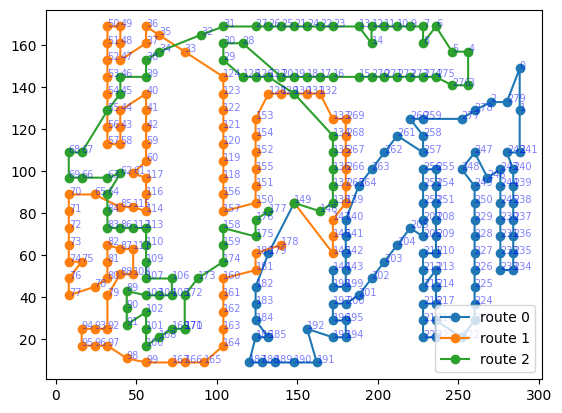

None

In [86]:
display(plot_solution(sol))
